In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
pn.extension("plotly")
import numpy as np
import seaborn as sns
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import os
import plotly.express as px
from PIL import Image
import requests
from io import BytesIO

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
# Creating paths for the CSV's
Kenya_path = Path('kenyausd final.csv')
Russia_path = Path('russiausd final.csv')
Singapore_path = Path('singaporeusd final.csv')
Ukraine_path = Path('ukraineusd final.csv')
Venezuela_path = Path('venusd final.csv')

In [3]:
# Loading in the CSV's for foreign currency and inferring datetime format
Kenya = pd.read_csv(Kenya_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Russia= pd.read_csv(Russia_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Singapore = pd.read_csv(Singapore_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Ukraine = pd.read_csv(Ukraine_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
Venezuela = pd.read_csv(Venezuela_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [4]:
# Loading in cryptocurrecy CSV's, SP500, and the US Dollar
btc=pd.read_csv("BITSTAMP_BTCUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
eth=pd.read_csv("COINBASE_ETHUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
ltc=pd.read_csv("COINBASE_LTCUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
dash=pd.read_csv("KRAKEN_DASHUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
xmr=pd.read_csv("KRAKEN_XMRUSD, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
sp500= pd.read_csv("SP_SPX, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)
dollar = pd.read_csv("TVC_DXY, 1D.csv", index_col="time", infer_datetime_format=True, parse_dates=True)

In [5]:
# Dropping unnecessary columns
btc = btc.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
eth = eth.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
ltc = ltc.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
dash = dash.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
xmr = xmr.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
sp500 = sp500.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])
dollar = dollar.drop(columns=["Plot", "Plot.1", "Plot.2", "Plot.3", "Plot.4", "Plot.5", "Plot.6", "Plot.7", "Jaw", "Teeth", "Lips", "RSI",'open', 'high', 'low'])

In [6]:
# Concatenating all cryptocurrencies together
crypto_all_no_dates = pd.concat([btc, eth, ltc, dash, xmr], axis=1, keys=["BTC", "ETH", "LTC", "DASH", "XMR"])

In [7]:
# Selected a data set of 5 years and dropped null values

crypto_all = crypto_all_no_dates[~(crypto_all_no_dates.index < '2017-04-21')]
crypto_all.index = crypto_all.index.date
crypto_all = crypto_all.reset_index()
crypto_all = crypto_all.groupby(['index']).sum()
crypto_all = crypto_all.replace(0, np.nan)
crypto_all = crypto_all.dropna()
crypto_all.index.names = ['Date']


sp500 = sp500[~(sp500.index < '2017-04-21')]
sp500.index = sp500.index.date
sp500.index.names = ['Date']

dollar = dollar[~(dollar.index < '2017-04-21')]
dollar.index = dollar.index.date
dollar.index.names = ['Date']

crypto_all

,BTC,ETH,LTC,DASH,XMR
,close,close,close,close,close
Date,,,,,
2017-04-21,1233.20,48.61,14.35,71.10240,20.01387
2017-04-22,1241.99,48.96,15.38,71.02448,20.02333
2017-04-23,1253.58,50.12,15.07,72.30000,19.58344
2017-04-24,1269.00,50.31,15.53,72.09146,19.60000
2017-04-25,1287.99,53.42,15.09,72.10000,19.50000
...,...,...,...,...,...
2022-04-17,40814.60,3056.19,111.24,108.72000,265.87000
2022-04-18,41505.77,3102.26,113.81,109.59700,254.39000


In [8]:
# Concatenated all foreign currencies for 5 years and dropped null values
concat = pd.concat([Kenya, Russia, Singapore, Ukraine, Venezuela], axis=1, keys=["KES", "RUB", "SGD", "UAH", "VES"])
Countries_currencies = concat[~(concat.index < '2017-04-21')] 
Countries_currencies = Countries_currencies.dropna()
Countries_currencies

,KES,RUB,SGD,UAH,VES
,close,close,close,close,close
Date,,,,,
2017-04-24,0.0097,0.017911,0.71794,0.03761,0.10015
2017-04-25,0.0095,0.017809,0.71724,0.03717,0.10015
2017-04-26,0.0095,0.017497,0.71622,0.03730,0.10015
2017-04-27,0.0095,0.017540,0.71553,0.03728,0.10015
2017-04-28,0.0095,0.017561,0.71560,0.03721,0.10015
...,...,...,...,...,...
2022-04-14,0.0086,0.012137,0.73687,0.03393,0.22564
2022-04-18,0.0086,0.012388,0.73341,0.03379,0.22529


In [9]:
# Selecting smaller stock for Monte Carlo simulations
small_monte_foreign = Countries_currencies[["KES", "UAH", "VES"]]

# Configure a Monte Carlo simulation to forecast 5 year of returns using those stocks
MC_small_foreign = MCSimulation(
    portfolio_data = small_monte_foreign,
    weights = [.33, .33, .33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulatino input data
MC_small_foreign.portfolio_data.head()

KES                   UAH                   VES             
             close daily_return    close daily_return    close daily_return
Date                                                                       
2017-04-24  0.0097          NaN  0.03761          NaN  0.10015          NaN
2017-04-25  0.0095    -0.020619  0.03717    -0.011699  0.10015          0.0
2017-04-26  0.0095     0.000000  0.03730     0.003497  0.10015          0.0
2017-04-27  0.0095     0.000000  0.03728    -0.000536  0.10015          0.0
2017-04-28  0.0095     0.000000  0.03721    -0.001878  0.10015          0.0

In [10]:
# Run a Monte Carlo Simulation to show five years of returns
MC_small_foreign.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004246,0.999819,0.998769,0.997786,1.002450,1.000536,1.002328,0.999573,0.997410,1.000629,...,1.002815,0.997893,1.001323,0.999750,1.002714,1.002551,0.997953,1.003824,0.999201,0.997393
2,1.005208,1.003087,0.999510,0.994499,1.004332,0.999764,1.006448,0.998413,0.999046,0.997999,...,1.001248,0.994484,0.997094,0.999831,1.001368,1.000705,1.000097,1.007202,1.001432,0.998564
3,1.008899,1.008739,1.001650,0.994666,1.004569,1.002445,1.006760,0.997164,1.001900,0.993885,...,1.004509,0.995096,0.996730,0.998009,0.999510,1.002081,1.002748,1.009216,1.003660,0.998511
4,1.009035,1.011291,1.000294,0.992879,1.004603,1.006012,1.010291,1.000408,0.999098,0.993503,...,1.006319,0.994070,0.997296,0.999967,1.000987,1.004171,0.999548,1.008799,1.004546,1.000416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.865056,0.809339,0.942084,0.850270,0.910890,0.960754,1.022913,1.041490,0.974524,0.831007,...,0.918032,0.982795,0.802580,0.915100,1.018793,0.850418,0.979386,0.954948,0.740674,1.014892
1257,0.864410,0.810493,0.944668,0.848448,0.910336,0.961462,1.024768,1.039473,0.973638,0.830251,...,0.918850,0.984554,0.803838,0.911747,1.020550,0.849511,0.979437,0.957374,0.739842,1.016961
1258,0.862911,0.809923,0.946416,0.850810,0.910245,0.964013,1.023804,1.040201,0.973675,0.828935,...,0.919627,0.983224,0.804778,0.914112,1.018714,0.847996,0.979177,0.957113,0.739697,1.016215
1259,0.863608,0.807992,0.947015,0.851259,0.911722,0.968666,1.026181,1.042139,0.972536,0.828202,...,0.919753,0.984078,0.804313,0.911624,1.016891,0.848562,0.979101,0.955479,0.739416,1.013162


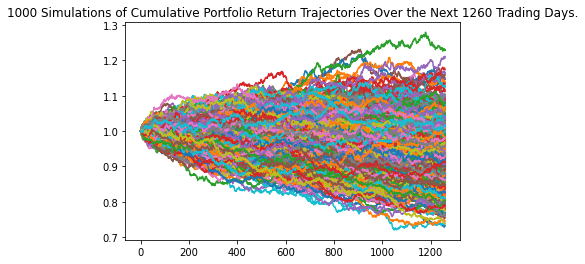

In [11]:
# Simulation outcomes
line_plot_foreign = MC_small_foreign.plot_simulation()

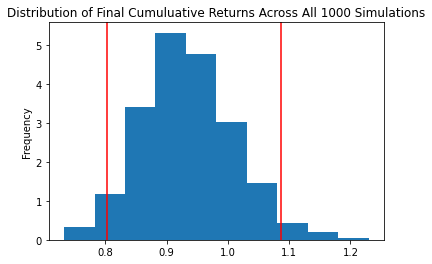

In [12]:
# Probability distribution
dist_plot_foreign = MC_small_foreign.plot_distribution()

In [13]:
# Fetch sumary statistics
foreign_summ = MC_small_foreign.summarize_cumulative_return()
print(foreign_summ)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in stocks
even_ci_lower = round(foreign_summ[8]*10000,2)
even_ci_upper = round(foreign_summ[9]*10000,2)

# Print results
output_foreign_msg = f"There is a 95% chance that an initial investment of $10,000 in a portfolio of these foreign currencies over the next 5 years will end within in the range of ${even_ci_lower} and ${even_ci_upper}."
output_foreign_msg 

count           1000.000000
mean               0.934784
std                0.074735
min                0.732485
25%                0.882756
50%                0.930498
75%                0.982430
max                1.229563
95% CI Lower       0.802691
95% CI Upper       1.085945
Name: 1260, dtype: float64


C:\Users\rache\Documents\Project One Github\Cryptocurrency-s-Effect-in-Other-Countries\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


'There is a 95% chance that an initial investment of $10,000 in a portfolio of these foreign currencies over the next 5 years will end within in the range of $8026.91 and $10859.45.'

In [14]:
# Picking smaller stocks of cryptocurrency
small_monte = crypto_all[["LTC", "DASH", "XMR"]]

# Configure a Monte Carlo simulation to forecast 5 year of returns using BTC, ETH, and DASH
MC_small = MCSimulation(
    portfolio_data = small_monte,
    weights = [.33, .33, .33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulatino input data
MC_small.portfolio_data.head()

LTC                   DASH                    XMR             
            close daily_return     close daily_return     close daily_return
Date                                                                        
2017-04-21  14.35          NaN  71.10240          NaN  20.01387          NaN
2017-04-22  15.38     0.071777  71.02448    -0.001096  20.02333     0.000473
2017-04-23  15.07    -0.020156  72.30000     0.017959  19.58344    -0.021969
2017-04-24  15.53     0.030524  72.09146    -0.002884  19.60000     0.000846
2017-04-25  15.09    -0.028332  72.10000     0.000118  19.50000    -0.005102

In [15]:
# Run a Monte Carlo Simulation to show five years of returns
MC_small.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018084,1.001678,1.002380,0.980976,1.007675,0.971272,0.951994,1.035105,0.995975,0.941551,...,1.008796,0.965824,0.924050,0.992111,1.024573,1.038792,1.038881,0.996154,1.054242,0.975141
2,0.962246,1.003667,1.074317,0.994741,1.046043,0.982213,0.999064,1.068900,0.965085,0.961229,...,0.975772,0.989881,0.963340,0.975522,1.123806,1.052165,1.025193,0.989368,1.057023,0.969955
3,0.956481,0.952534,1.076293,0.965774,1.076491,1.008098,1.062104,1.030759,0.971653,0.989592,...,1.016118,1.026257,1.010271,0.948000,1.016438,1.001317,1.030213,1.033742,1.045331,0.936292
4,1.060905,0.995978,1.087242,0.889120,1.077914,1.024638,1.103365,1.044843,0.966842,1.031388,...,1.010318,1.018598,1.023514,0.897648,1.027679,0.985557,1.059621,1.006655,1.013645,0.878670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,42.293795,13.883706,14.836121,16.629787,9.780284,40.306612,9.167403,8.852106,8.922358,69.304121,...,15.039975,5.818022,5.950959,1.773874,4.656911,46.942660,114.300094,41.566028,19.977443,131.342267
1257,40.279150,14.753827,14.150608,16.301681,9.680305,40.954141,9.382098,9.094374,9.505916,71.068385,...,15.212035,5.816657,5.931872,1.814427,4.616908,47.999039,113.289521,41.245807,20.300465,131.061223
1258,40.905540,15.126603,13.836762,15.603406,9.309401,37.342418,9.505237,9.264867,9.664094,76.598568,...,16.067920,5.712044,6.500976,1.805186,4.617628,49.176435,118.953311,39.438884,20.913614,134.186294
1259,43.443010,16.013765,14.025860,15.662514,9.069130,36.291116,9.889347,9.078128,9.669152,79.478610,...,16.205890,6.099109,6.469072,1.980177,4.515687,50.952305,120.100275,40.277404,21.327980,136.976988


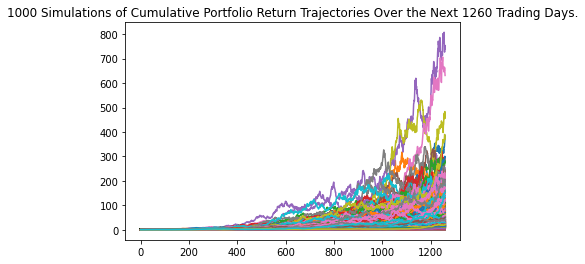

In [38]:
# Simulation outcomes
small_line = MC_small.plot_simulation()

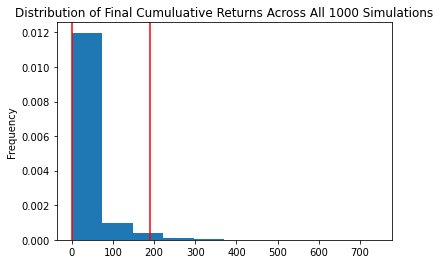

In [17]:
# Simulation outcomes
small_plot = MC_small.plot_distribution()

In [18]:
# Fetch sumary statistics
small_summ = MC_small.summarize_cumulative_return()
print(small_summ)

count           1000.000000
mean              34.465004
std               56.657503
min                0.232440
25%                6.182614
50%               15.816758
75%               40.207128
max              739.760407
95% CI Lower       1.227983
95% CI Upper     190.220845
Name: 1260, dtype: float64


C:\Users\rache\Documents\Project One Github\Cryptocurrency-s-Effect-in-Other-Countries\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in stocks
lower_small = round(small_summ[8]*10000,2)
upper_small = round(small_summ[9]*10000,2)

# Print results
output_crypto_msg = f"There is a 95% chance that an initial investment of $10,000 in a portfolio of these cryptocurrencies over the next 5 years will end within in the range of ${lower_small} and ${upper_small}."
output_crypto_msg

'There is a 95% chance that an initial investment of $10,000 in a portfolio of these cryptocurrencies over the next 5 years will end within in the range of $12279.83 and $1902208.45.'

In [20]:
# Daily returns already calculated previously
daily_returns = crypto_all.pct_change()
daily_returns = daily_returns.dropna()

# Calculate annualized volatility of stocks
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)

The most volatile stocks you could purchase would be Litecoin, Dash, and Monero


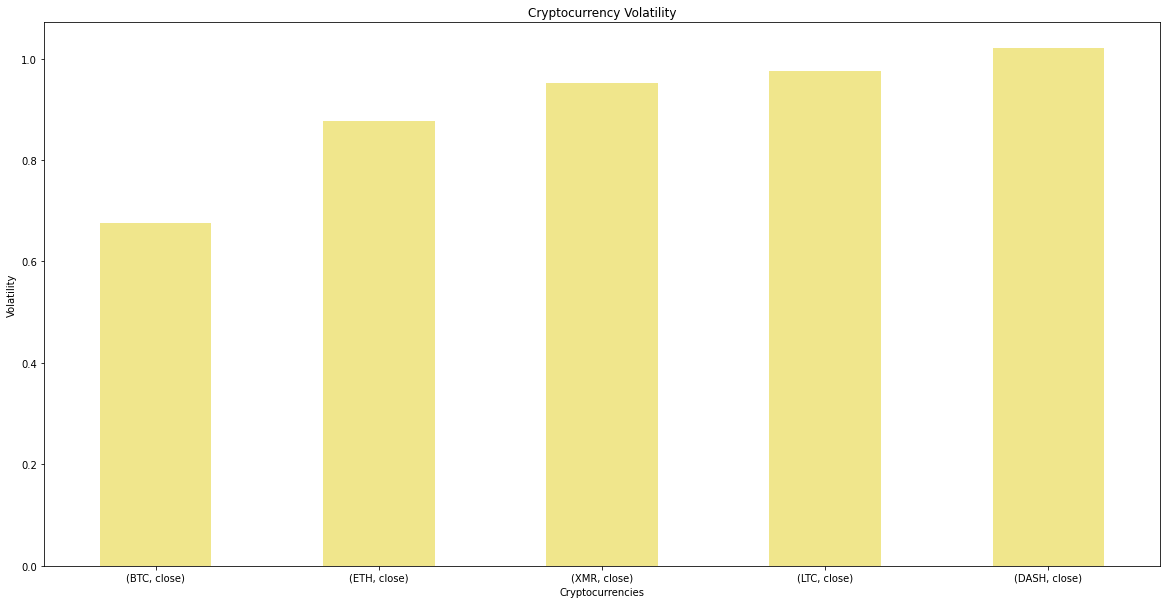

In [21]:
# Volatility of each cryptocurrency to assess risk
volatility_plot = volatility.plot(kind='bar',figsize=(20,10), title = "Cryptocurrency Volatility", xlabel="Cryptocurrencies", ylabel= "Volatility", color="khaki", rot = 0)
print("The most volatile stocks you could purchase would be Litecoin, Dash, and Monero")

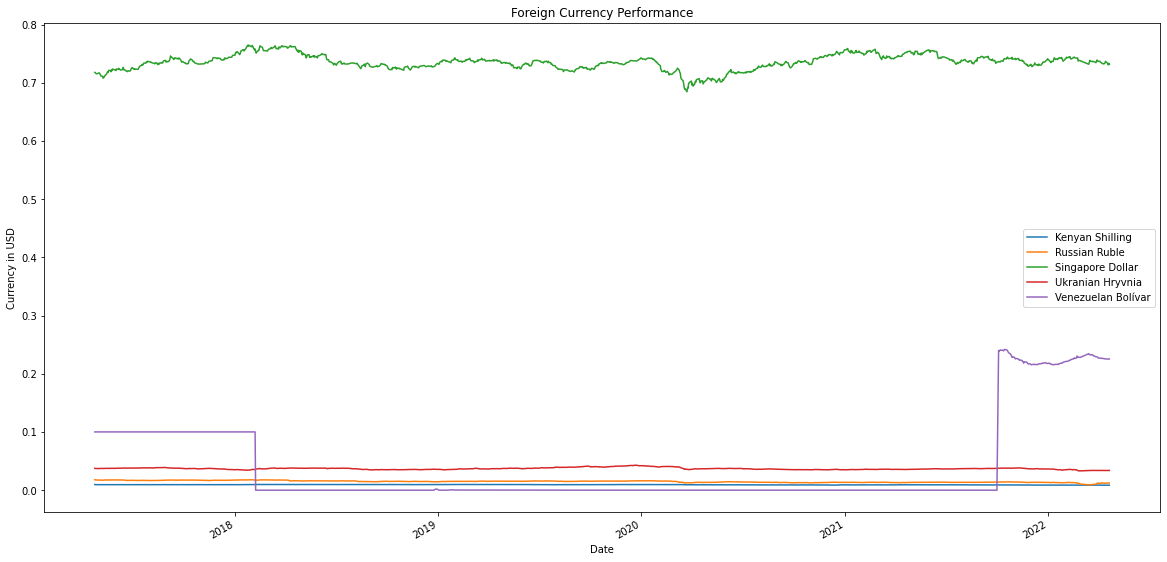

In [22]:
# Plotting all foreign currencies together
Countries = Countries_currencies.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Foreign Currency Performance")
Countries.legend(['Kenyan Shilling', 'Russian Ruble', 'Singapore Dollar', 'Ukranian Hryvnia', 'Venezuelan Bolívar'])

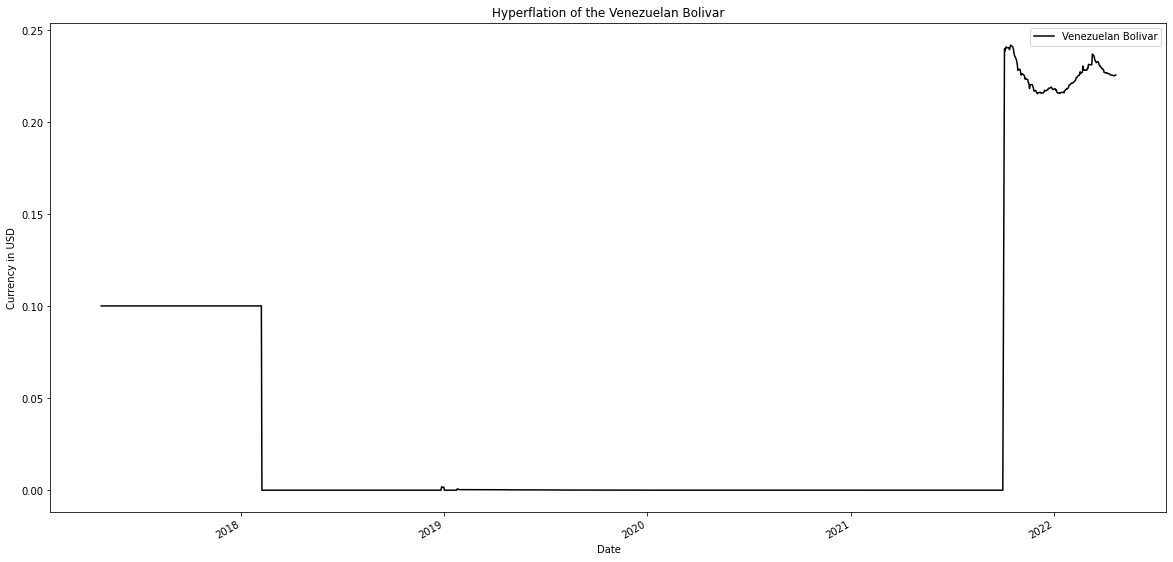

In [23]:
#Venezuela only
Venplot = Venezuela.plot(color = "Black", kind='line', xlabel = "Date", ylabel = "Currency in USD", figsize=(20,10), title = "Hyperflation of the Venezuelan Bolivar")
Venplot.legend(['Venezuelan Bolivar'])

<AxesSubplot:title={'center':'2022 Russian invasion of Ukraine'}, xlabel='Date', ylabel='Currency in USD'>

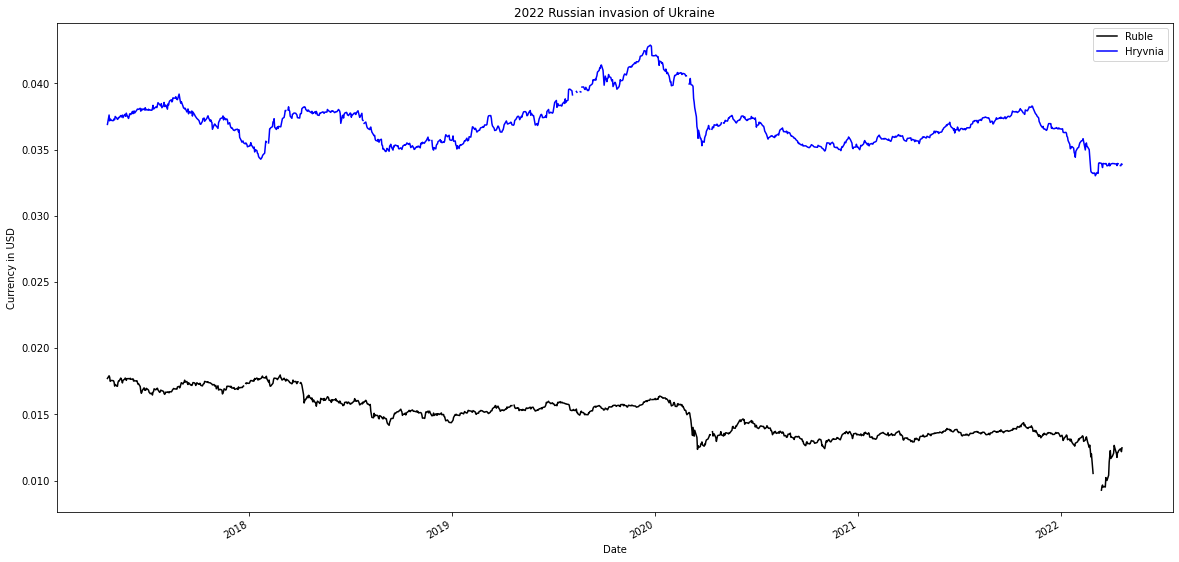

In [24]:
# Russia and Ukraine plot
Russia_Ukr = pd.concat([Russia, Ukraine], axis=1)
Russia_Ukr.dropna()
columns = ['Ruble', 'Hryvnia']
Russia_Ukr.columns = columns
Russia_Ukr.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "2022 Russian invasion of Ukraine", color =("black","blue"))

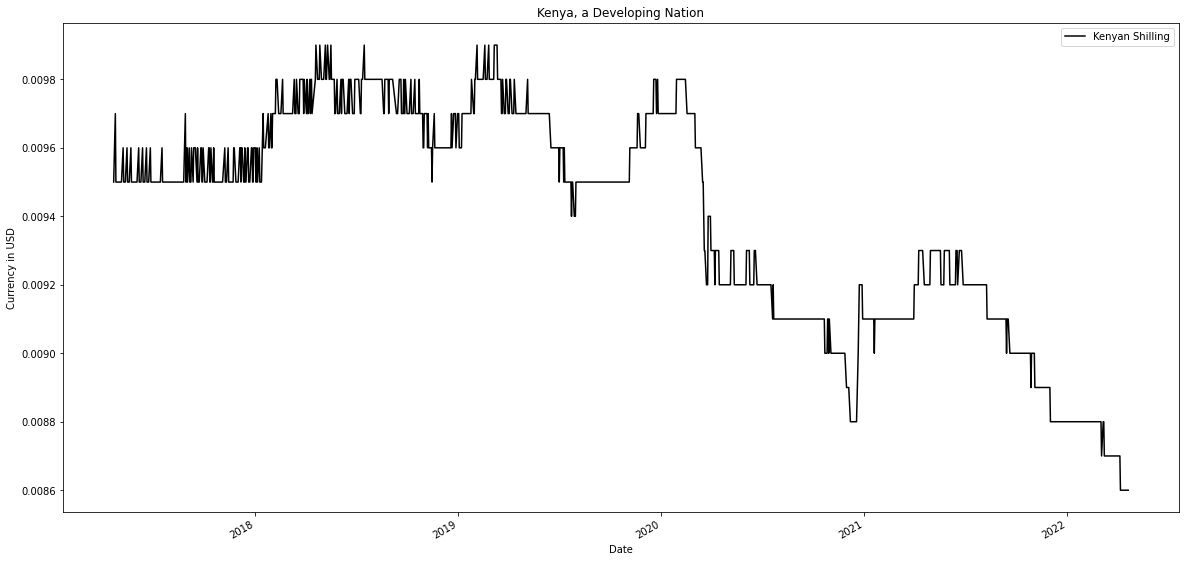

In [25]:
# Kenya plot
Kenyaplot = Kenya.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Kenya, a Developing Nation", color = 'black')
Kenyaplot.legend(['Kenyan Shilling'])

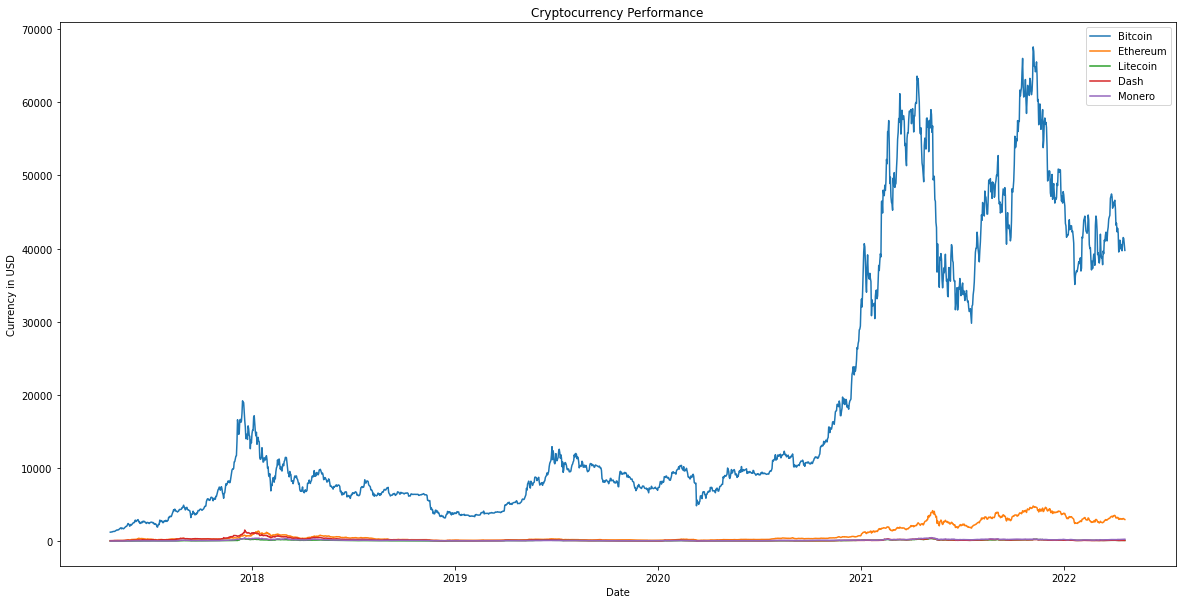

In [26]:
# All cryptocurrencies plotted together
crypto_plot = crypto_all.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Cryptocurrency Performance")
crypto_plot.legend(['Bitcoin', 'Ethereum', 'Litecoin', 'Dash', 'Monero'])

In [27]:
# Cryto with removal of bitcoin to show smaller stock more effectively
crypto_no_bitcoin = pd.concat([eth, ltc, dash, xmr], axis=1, keys=["ETH", "LTC", "DASH", "XMR"])
crypto_no_bitcoin_dates = crypto_no_bitcoin[~(crypto_no_bitcoin.index < '2017-04-21')] 

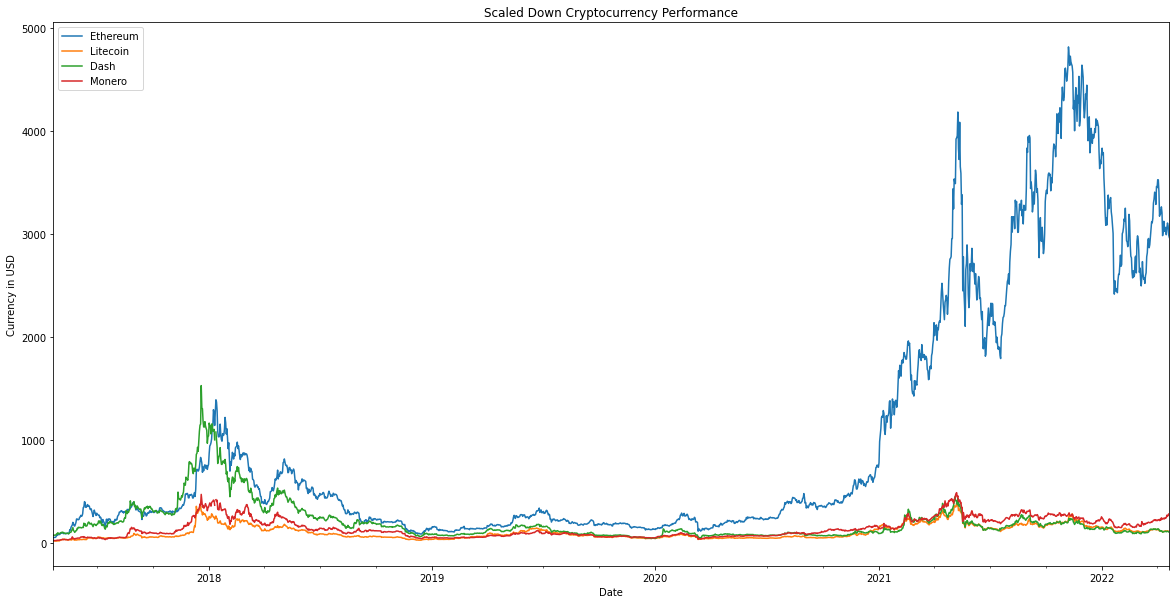

In [28]:
# All crypto without bitcoin plot
crypto_no_bitcoin_dates_plot = crypto_no_bitcoin_dates.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Scaled Down Cryptocurrency Performance")
crypto_no_bitcoin_dates_plot.legend(['Ethereum', 'Litecoin', 'Dash', 'Monero'])

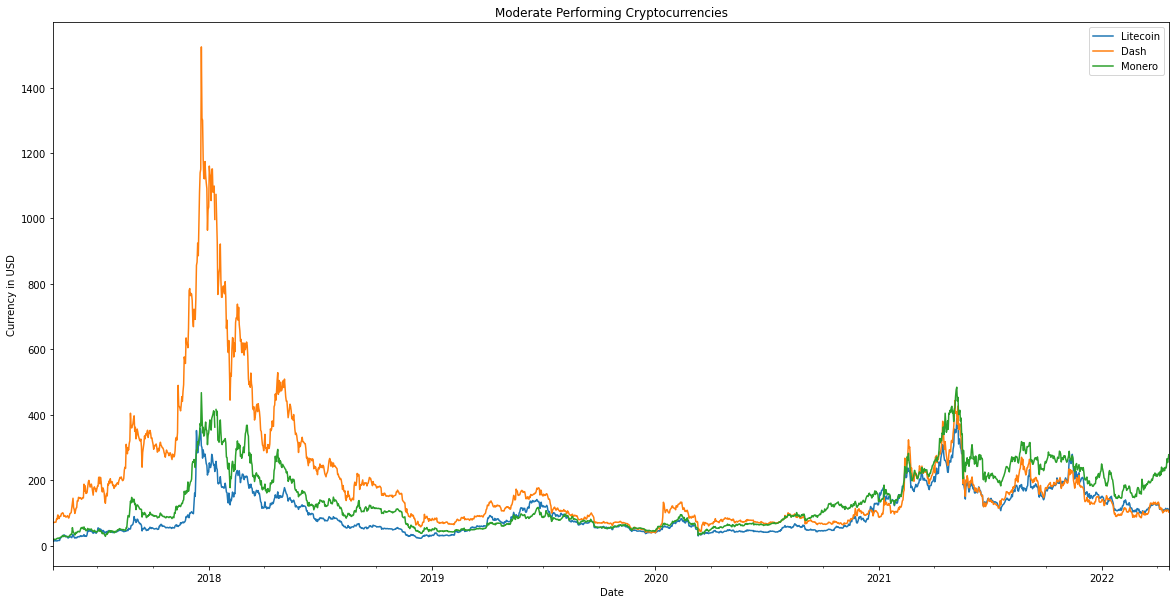

In [29]:
# All crypto without ethereum and bitcoin to show them more in depth
crypto_just_3_lowest = pd.concat([ltc, dash, xmr], axis=1, keys=["LTC", "DASH", "XMR"])
crypto_just_3_lowest_dates = crypto_just_3_lowest[~(crypto_just_3_lowest.index < '2017-04-21')] 
crypto_just_3_lowest_dates_plot = crypto_just_3_lowest_dates.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Moderate Performing Cryptocurrencies")
crypto_just_3_lowest_dates_plot.legend(['Litecoin', 'Dash', 'Monero'])

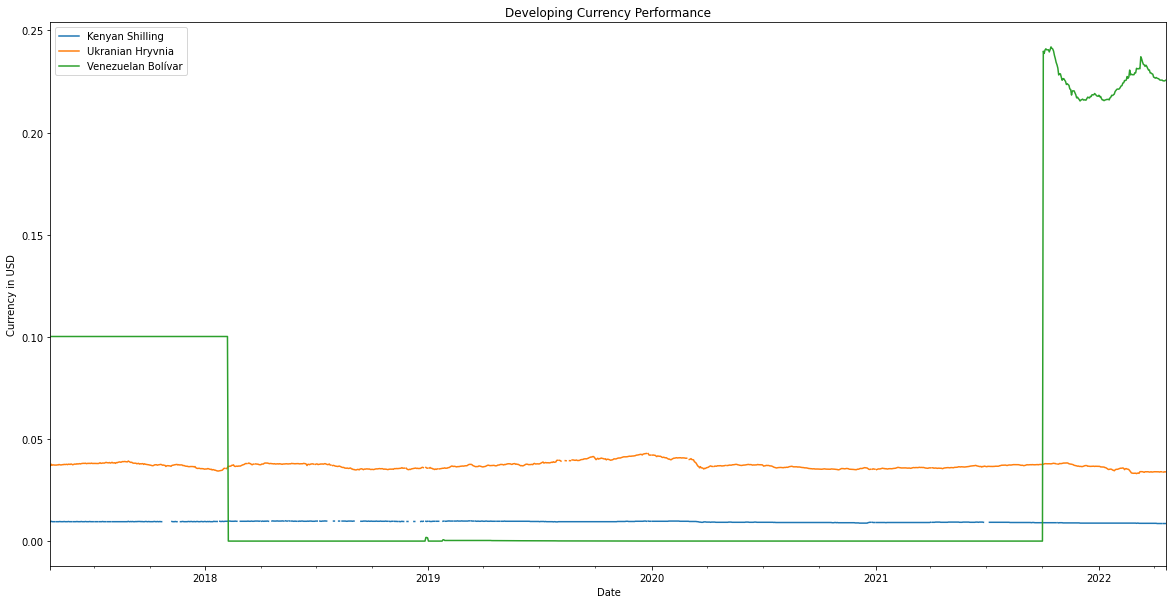

In [30]:
# Plot of developing countries and cryptocurrency performance
developing = pd.concat([Kenya, Ukraine, Venezuela], axis=1, keys=["KES", "UAH", "VES"])
Countries_currencies_clean = developing[~(developing.index < '2017-04-21')] 
Countries_currencies_plot = Countries_currencies_clean.plot(figsize=(20,10), xlabel = "Date", ylabel = "Currency in USD", title = "Developing Currency Performance")
Countries_currencies_plot.legend(['Kenyan Shilling', 'Ukranian Hryvnia', 'Venezuelan Bolívar'])

Text(4, 8.52, '8.52%')

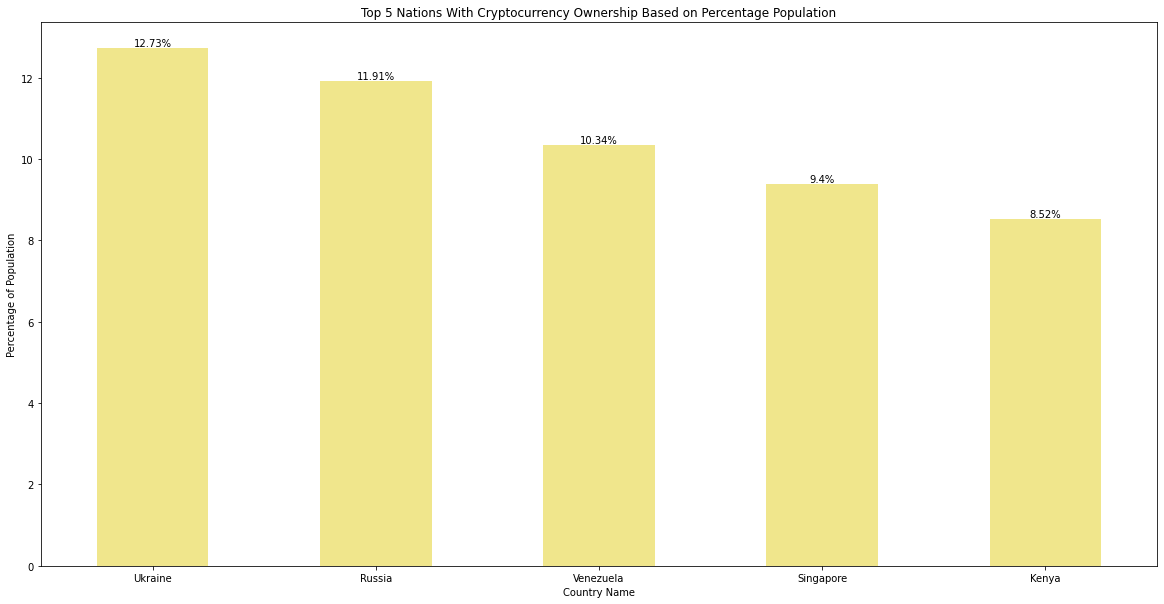

In [31]:
# Top 5 countries with cryptocurrency usage based on population 
df = pd.read_csv("World Usage.csv").drop_duplicates()
data_to_plot = df[["Country", "Percentage of population", "Latitude", "Longitude"]]
df.index = df['Country']

y=df['Percentage of population']
bar = df['Percentage of population'].nlargest(n=5).plot(color = "khaki", kind='bar', xlabel = "Country Name", ylabel = "Percentage of Population", figsize=(20,10), title = "Top 5 Nations With Cryptocurrency Ownership Based on Percentage Population", rot='horizontal')
bar.text(0,y[0],"12.73%",ha="center",va="bottom")
bar.text(1,y[1],"11.91%",ha="center",va="bottom")
bar.text(2,y[2],"10.34%",ha="center",va="bottom")
bar.text(3,y[3],"9.4%",ha="center",va="bottom")
bar.text(4,y[4],"8.52%",ha="center",va="bottom")


,"(KES, close)","(RUB, close)","(SGD, close)","(UAH, close)","(VES, close)",close
"(KES, close)",1.000000,0.763211,-0.023970,0.440310,-0.487676,0.113089
"(RUB, close)",0.763211,1.000000,0.092565,0.468804,-0.092174,-0.035514
"(SGD, close)",-0.023970,0.092565,1.000000,-0.180958,0.049584,-0.796612
"(UAH, close)",0.440310,0.468804,-0.180958,1.000000,-0.196009,0.331953
"(VES, close)",-0.487676,-0.092174,0.049584,-0.196009,1.000000,0.106762
close,0.113089,-0.035514,-0.796612,0.331953,0.106762,1.000000


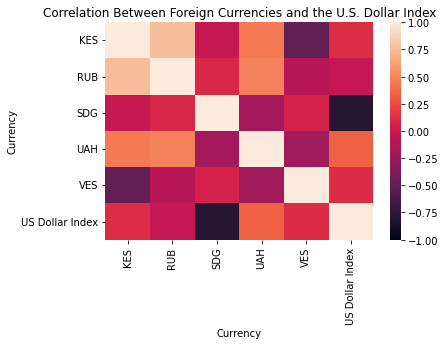

In [34]:
# Performed heatmap correlation of how foreign currencies increase or decrease and if they are correlated
dollar.index = pd.to_datetime(dollar.index, utc=True) 
Countries_currencies.index = pd.to_datetime(Countries_currencies.index, utc=True)
country_usd = pd.concat([Countries_currencies,dollar], axis=1)
country_usd.dropna()
country_usd_corr = country_usd.corr()
x_labels = ['KES', 'RUB', 'SDG', 'UAH', 'VES', 'US Dollar Index']
country_heatmap = sns.heatmap(country_usd_corr, vmin=-1, vmax=1, xticklabels = x_labels, yticklabels = x_labels)
country_heatmap.set_title('Correlation Between Foreign Currencies and the U.S. Dollar Index')
country_heatmap.set_xlabel('Currency')
country_heatmap.set_ylabel('Currency')


country_usd_corr

Text(33.0, 0.5, 'Currency')

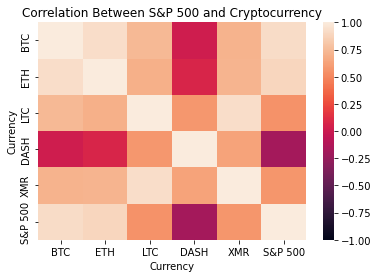

In [39]:
# Heatmap correlation of SP500 and Cryptocurrencies

crypto_all.index = pd.to_datetime(crypto_all.index, utc=True) 
sp500.index = pd.to_datetime(sp500.index, utc=True) 
crypto_sp500 = pd.concat([crypto_all,sp500], axis=1)
crypto_sp500.dropna()
all_correlation = crypto_sp500.corr()
x_labels_for_all = ['BTC','ETH','LTC','DASH','XMR','S&P 500']
crypto_sp500_map = sns.heatmap(all_correlation, vmin=-1, vmax=1, xticklabels = x_labels_for_all, yticklabels = x_labels_for_all)
crypto_sp500_map.set_title('Correlation Between S&P 500 and Cryptocurrency')
crypto_sp500_map.set_xlabel('Currency')
crypto_sp500_map.set_ylabel('Currency')

Tabs
    [0] Row
        [0] PNG(PngImageFile)
        [1] Markdown(str)
    [1] Row
        [0] PNG(PngImageFile)
        [1] Markdown(str)
    [2] Row
        [0] PNG(PngImageFile)
        [1] Markdown(str)
    [3] PNG(PngImageFile, name='Correlation b...)
    [4] PNG(PngImageFile, name='Correlation b...)
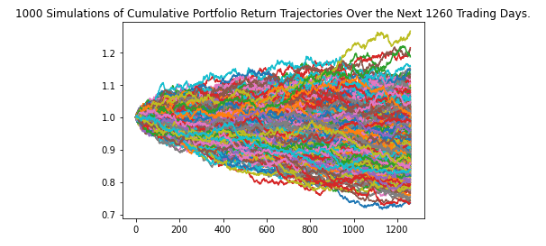
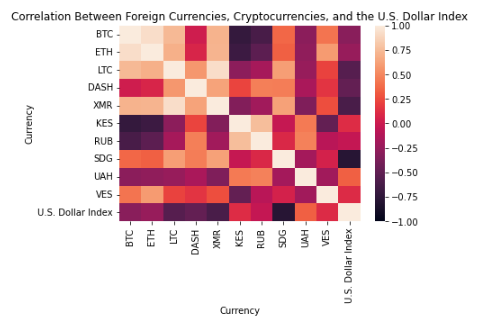
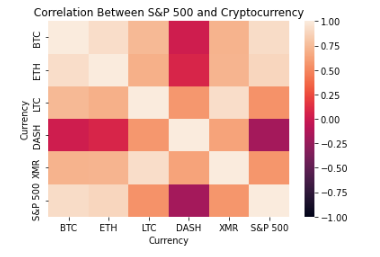
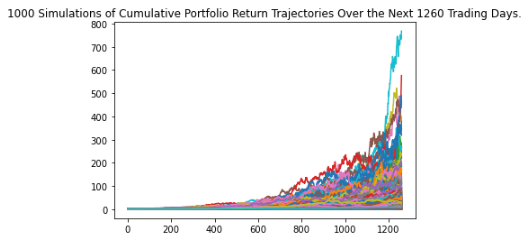
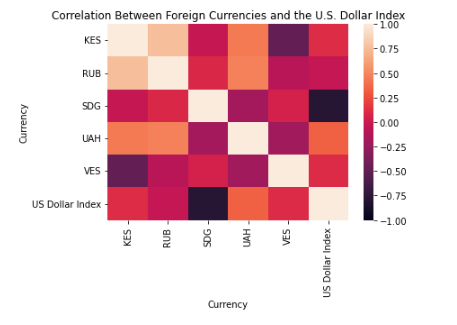

In [37]:
# PIL Dashboarding

foreign_monte_img = requests.get('https://i.gyazo.com/8e86dc3887d4e5c6e49c71228357a220.png')
foreign_img = Image.open(BytesIO(foreign_monte_img.content))
foreign_print = output_foreign_msg
foreign_rows = pn.Row(foreign_img, foreign_print)

crypto_monte_img = requests.get('https://i.gyazo.com/93b0ad1f5f52dc9978c8691db482b097.png')
crypto_img = Image.open(BytesIO(crypto_monte_img.content))
crypto_print = output_crypto_msg
crypto_rows = pn.Row(crypto_img, crypto_print)

country_heatmap_img = requests.get('https://i.gyazo.com/2dea056ef734a2c78c7f3ef5a91f1fd9.png')
country_heatmap_imgfinal = Image.open(BytesIO(country_heatmap_img.content))
country_heatmap_text = "We see that the U.S. Dollar Index, determined by other foreign major currencies, is strongly negatively correlated with the Singapore Dollar. When the U.S. Dollar Index appreciates, the Singapore Dollar is expected to depreciate, and vice verca."
country_heatmap_rows = pn.Row(country_heatmap_imgfinal, country_heatmap_text)

crypto_sp500_map_img = requests.get('https://i.gyazo.com/85031d40549fd3bd9a3e3534938ad13b.png')
crypto_sp500_map_imgfinal = Image.open(BytesIO(crypto_sp500_map_img.content))
crypto_sp500_map_text = "We see that the S&P 500, an index of major American companies, is strongly positively correlated with Bitcoin. When the value of Bitcoin appreciates, the S&P 500 is expected to appreciate, and vice verca."
crypto_sp500_map_rows = pn.Row(crypto_sp500_map_imgfinal, crypto_sp500_map_text)


all_currency_map_index_img = requests.get('https://i.gyazo.com/fce34dc3378dce0e5702749880825467.png')
all_currency_map_index_imgfinal = Image.open(BytesIO(all_currency_map_index_img.content))
all_currency_map_index_text = "We see that the Kenyan Shilling is strongly negatively correlated with Bitcoin. When the value of Bitcoin appreciates, the Kenyan Shilling is expected to depreciate, and vice verca."
all_currency_map_index_rows = pn.Row(all_currency_map_index_imgfinal, all_currency_map_index_text)

tabs=pn.Tabs(
("Foreign Monte Carlo", foreign_rows),
("Crypto Monte Carlo", crypto_rows),
("Correlation between foreign currencies and U.S. Dollar Index", country_heatmap_rows),
("Correlation between cryptocurrencies and S&P 500", crypto_sp500_map_imgfinal),
("Correlation between all currencies and U.S. Dollar Index", all_currency_map_index_imgfinal)
)

tabs